# DS-SF-36 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

C:\Users\suvas\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [7]:
df.shape[0]

400

Answer: 400

> ### Question 2.  Create a summary table.

In [8]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [9]:
df.gre.var()

13369.953039758006

In [17]:
df.gpa.var()

0.14487948622204228

Answer: GRE value of the difference from mean is higher than of GPA.

> ### Question 4.  Drop data points with missing data.

In [25]:
df[df.gre.isnull() ==True]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [26]:
df[df.gpa.isnull() ==True]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


In [27]:
df[df.prestige.isnull() ==True]

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


In [143]:
df_clean=df.dropna()

In [144]:
df_clean

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [33]:
df_clean.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: Count the data that are null. If count of null data is zero, then its valid.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

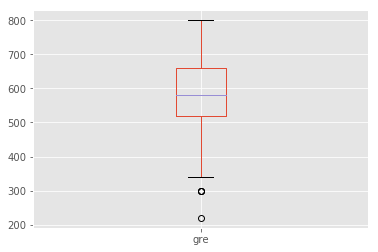

In [34]:
df_clean.gre.plot(kind='box')

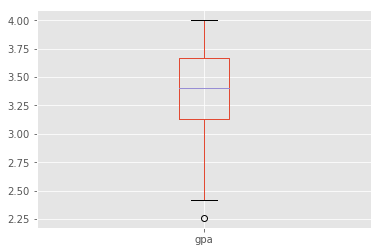

In [36]:
df_clean.gpa.plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer: 
* Min, Max, First Quartile, Median, Third Quartile
* Outliers

> ### Question 8.  Plot the distribution of each variable.

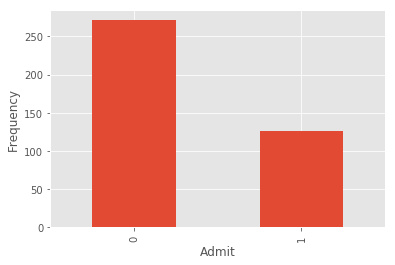

In [95]:
df_clean.admit.value_counts().plot(kind='bar')
plt.xlabel('Admit')
plt.ylabel('Frequency')

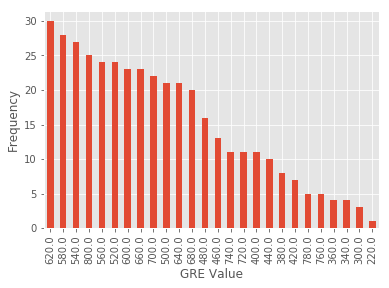

In [94]:
df_clean.gre.value_counts().plot(kind='bar')
plt.xlabel('GRE Value')
plt.ylabel('Frequency')

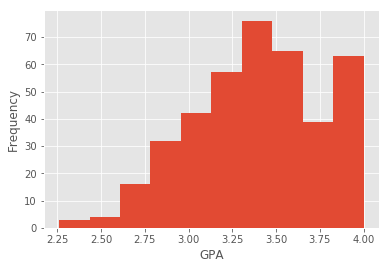

In [102]:
df_clean.gpa.plot(kind='hist')
plt.xlabel('GPA')
plt.ylabel('Frequency')

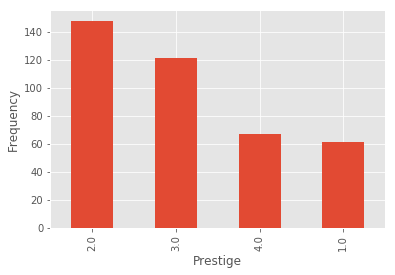

In [107]:
df_clean.prestige.value_counts().plot(kind='bar')
plt.xlabel('Prestige')
plt.ylabel('Frequency')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Only considering gre and gpa value won't be sufficient to make assumption of admit or not. Data of prestige also plays important role on making admission decision.

Distribution of ony gre and gpa need to make correction. Ignoring the relationship of prestige is not sufficient on making admit decision. We have to build relationship between admission, gpa, gre and prestige.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000268D9710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000026C19240>]], dtype=object)

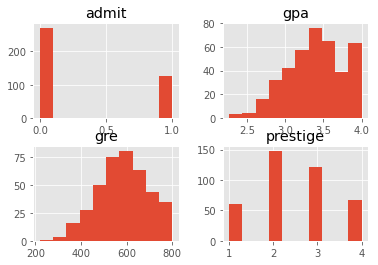

In [108]:
df_clean.hist()

Answer: TODO

> ### Question 10.  Create a correlation matrix for the dataset.

In [109]:
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: 
* gre and gpa equally play significant role on making admit decision. Lower the prestige value, higher will be the chances of getting admission
* gre and gpa are potentially colinear

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

# show relationship between <u>admit</u> and <u>prestige</u>

In [112]:
pd.crosstab(df.admit,df.prestige, rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


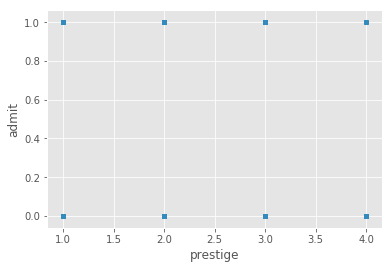

In [111]:
df_clean.plot(kind='scatter',x='prestige',y='admit')

In [155]:
df_clean['prestige_1']= df_clean.prestige.apply( lambda x: 1 if x == 1 else 0)
df_clean['prestige_2']= df_clean.prestige.apply( lambda x: 1 if x == 2 else 0)
df_clean['prestige_3']= df_clean.prestige.apply( lambda x: 1 if x == 3 else 0)
df_clean['prestige_4']= df_clean.prestige.apply( lambda x: 1 if x == 4 else 0)


C:\Users\suvas\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\suvas\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\suvas\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [156]:
df_clean

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...
395,0,620.0,4.00,2.0,0,1,0,0
396,0,560.0,3.04,3.0,0,0,1,0
397,0,460.0,2.63,2.0,0,1,0,0
398,0,700.0,3.65,2.0,0,1,0,0


In [165]:
df_clean[['admit','prestige_1','prestige_2','prestige_3','prestige_4']].groupby('admit').sum()

,prestige_1,prestige_2,prestige_3,prestige_4
admit,,,,
0,28,95,93,55
1,33,53,28,12


Answer: Just looking at prestige alone of undergraduate schools value, we can not make decision of admission. There is no direct relationship between admit and prestige variables.

> ### Question 13.  What is your hypothesis?

Answer: TODO